Iris Dataset is a famous dataset used in machine learning for classification task. There are multiple ways we can load Iris dataset into the memory like pandas read_csv, numpy load_text and we can directly import dataset from scikit load_iris method. 

## 1. Problem: 
Can you build a model that can classify the new flower based on the given Iris Dataset?

In [1]:
# check the version of libraries
import sys
print('python: {}'.format(sys.version))
import numpy as np
print('Numpy: {}'.format(np.__version__))
import pandas as pd
print('Pandas: {}'.format(pd.__version__))
import matplotlib
print('Matplotlib: {}'.format(matplotlib.__version__))
import sklearn
print('Sklearn: {}'.format(sklearn.__version__))

python: 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
Numpy: 1.14.3
Pandas: 0.23.0
Matplotlib: 2.2.2
Sklearn: 0.19.1


In [2]:
# import libraries with alias
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Load the Data

In [3]:
iris = pd.read_csv('dataset/iris.csv', header = None, names = ['sepal_length','sepal_width','petal_length','petal_width','category'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,category
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 3. Summarize the Dataset

### Check Dimension

In [4]:
iris.shape

(150, 5)

### Check for Index and Non Null Entries as well as Type of Features

In [5]:
iris.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
category        150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


### Get Statistical Summary of Dataset

In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Check Class Distribution 

In [7]:
iris.groupby('category').size()

category
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## Data Visualization

Once we have a statistics summary of datset, its time to visualize dataset for studying relationship between attributes. 
Univariate plots are used to undersand each attribute and Multivariate plots are used to study relationship between attributes.

### Univariate plots

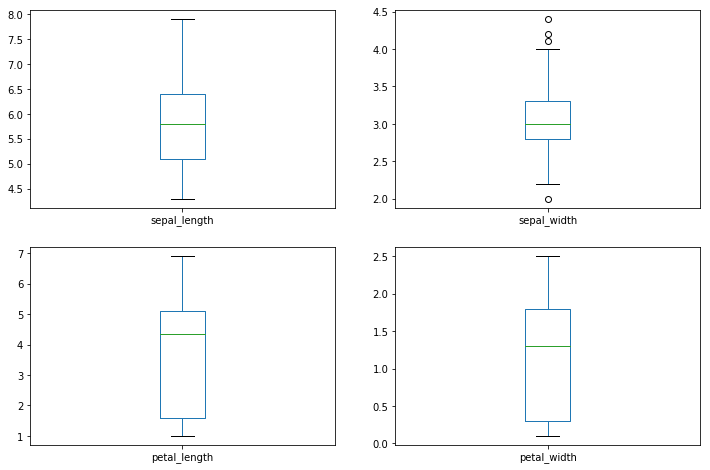

In [8]:
# box and whisker plot to check statistical summary 
iris.plot(kind = 'box', subplots = True, layout = (2,2), sharey = False, sharex = False, figsize=(12,8))
plt.show()

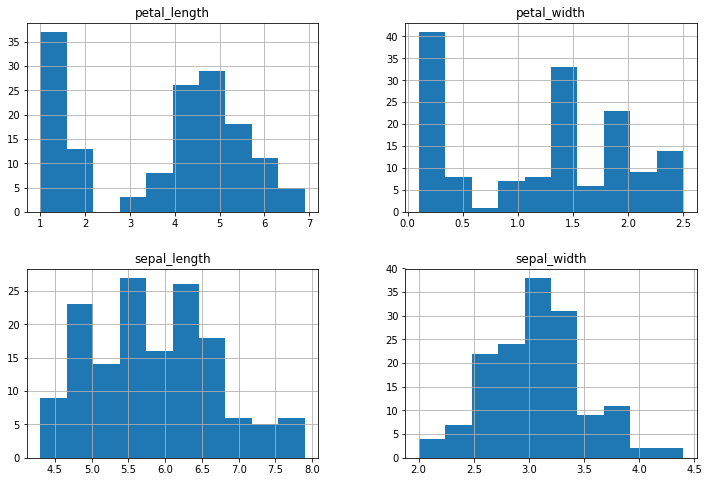

In [9]:
# Histogram to check distribution
iris.hist(figsize = (12,8))
plt.show()

#### It seems like sepal_length and sepal_width follow Normal Distribution. 

### Multivariate Plots

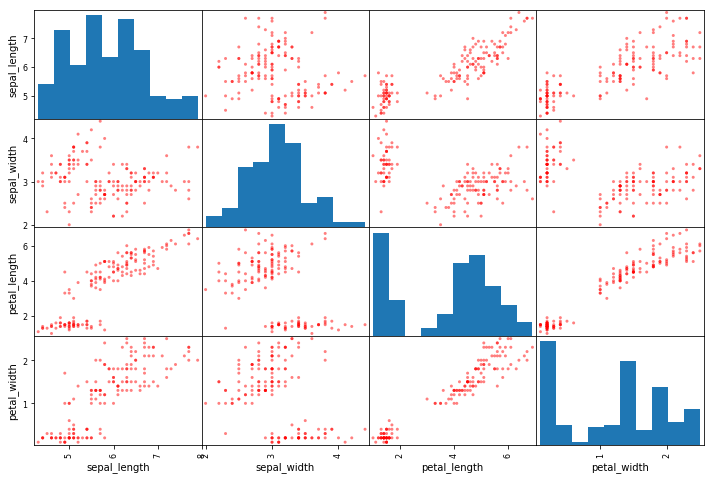

In [10]:
# plot scatter matrix
from pandas.plotting import scatter_matrix
scatter_matrix(iris, figsize = (12,8), c = 'red')
plt.show()

#### Scatter Matrix indicate High Positive Correlation between some features.

In [11]:
# scikit learn works with numpy arrays 
# so convert data into ndarray values
iris_1 = iris.values
X = iris_1[:,0:4]
y = iris_1[:,4]

### Perform Validation of Dataset before Evaluating Algorithms

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = 0.2, stratify = y)

Now we have training data in the X_train and Y_train for preparing models and a X_validation and Y_validation sets that we can use later.

### Build Models

In [13]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [14]:
# Evaluate each model in turn
results = []
names =  []
for name, model in models:
    kfold = KFold(n_splits = 10, random_state = 42)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' %(name,cv_results.mean(),cv_results.std())
    print(msg)

LR: 0.941667 (0.075000)
LDA: 0.966667 (0.040825)
KNN: 0.975000 (0.038188)
CART: 0.950000 (0.055277)
NB: 0.958333 (0.055902)
SVM: 0.975000 (0.038188)


#####  It seems that KNN and SVM has largest estimated accurac score

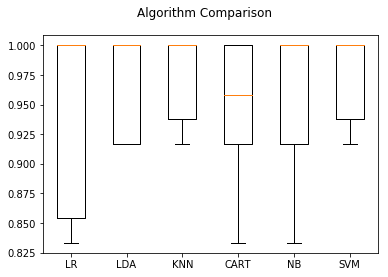

In [15]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

##### Some models are squashed at the top of range, with many samples achieving 100% accuracy.

### Make Predictions

In [16]:
param_grid = {'n_neighbors': np.arange(1,10) }  # Tuning hyperparameters
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv = 5)
knn_cv.fit(X_train, y_train)
print('Best n_neighbors: {}'.format(knn_cv.best_params_))
print('\nBest score: {}'.format(knn_cv.best_score_))
pred = knn_cv.predict(X_test)
print('\nAccuracy_score: {}'.format(accuracy_score(y_test, pred)))
print('\nConfusion matrix:\n')
print(confusion_matrix(y_test, pred))
print('\nClassification report:\n')
print(classification_report(y_test, pred))

Best n_neighbors: {'n_neighbors': 6}

Best score: 0.9833333333333333

Accuracy_score: 0.9666666666666667

Confusion matrix:

[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]

Classification report:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

    avg / total       0.97      0.97      0.97        30



So, Knn classifier predicted the category of species on Test data with 96% accuracy.